In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"]
})

In [2]:
common_settings = {
'omega_b':0.022,
'h':0.67810,
'z_reio':7.6711,
'YHe':0.25,
'perturbations_verbose':0,
'background_verbose':0,
'output':'mTk, vTk, mPk',
'gauge':'newtonian',
'P_k_max_1/Mpc':10,
'z_max_pk':1000,
'format':'class',
'omega_cdm':0.12,
}
chiCDM = Class()
# pass input parameters
chiCDM.set(common_settings)

True

In [5]:
kJ0p5vals = [0.01,0.9,10000]
f_chi=0.1
Plin_list=[]
for kJ0p5v in kJ0p5vals:
    chiCDM.set({
    'omega_cdm':0.1,
    'omega_chi':0.02,
    # 'f_chi':f_chi,
    'acs_chi':0.0321*0.01/kJ0p5v,
    'cs2_peak_chi':1./3.,
    })
    print(kJ0p5v, 0.0321*0.01/kJ0p5v)
    chiCDM.compute()

    kk = np.logspace(-3.,0.,200); h = chiCDM.h(); Pk_ini=[]
    for k in kk:
        Pk_ini.append(chiCDM.pk_lin(k*h,0.5)*h**3) # function .pk(k,z)
    Plin_list.append(np.array(Pk_ini))

    background = chiCDM.get_background() # load background table
    kJ_int_val=interp1d(background['z'],background['(.)kJ_chi'])(0.5)

Plin_list=np.array(Plin_list)

0.01 0.0321
0.9 0.00035666666666666664
10000 3.21e-08


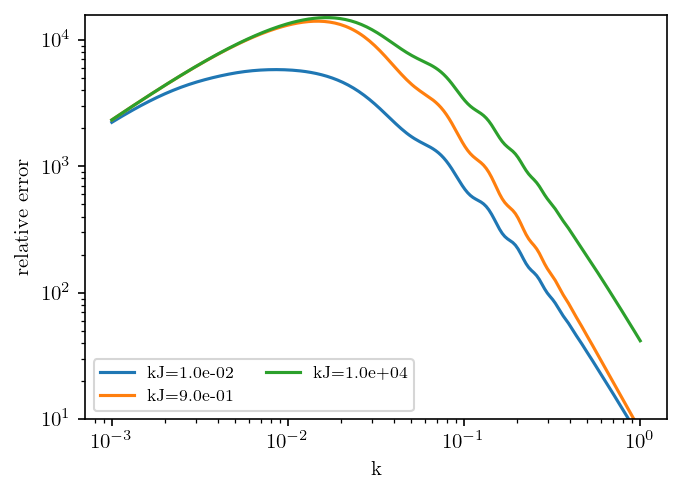

2.3010299956639813 -0.3010299956639812


In [6]:
plt.figure(figsize=(5.,3.5), dpi=150)

for i in range(len(kJ0p5vals)):
    plt.plot(kk, Plin_list[i], label=f'kJ={kJ0p5vals[i]:.1e}')

plt.ylim([10,None])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('relative error')
plt.legend(loc='best', fontsize=8, ncol=2)

plt.show()
print(np.log10(200),np.log10(0.5))

In [90]:

chiCDM = Class()
chiCDM.set(common_settings)
chiCDM.compute()
print(chiCDM.Hubble(0.5))
bkg_0 = chiCDM.get_background() # load background table
Pm_0 = np.array([chiCDM.pk_lin(k*chiCDM.h(), 0.5)*chiCDM.h()**3 for k in kk])
chiCDM.set({
'omega_cdm':0.,
'omega_chi':0.12,
'acs_chi':0.0321*0.01/1000,
'cs2_peak_chi':1./3.,
})
chiCDM.compute()
print(chiCDM.Hubble(0.5))
bkg_2 = chiCDM.get_background() # load background table
Pm_2 = np.array([chiCDM.pk_cb_lin(k*chiCDM.h(), 0.5)*chiCDM.h()**3 for k in kk])


0.00029783361209228105
0.00029783361209228105


In [91]:
print(background.keys())
for key in ['z', 'proper time [Gyr]', '(.)rho_crit', '(.)rho_tot']:
    print(bkg_0[key][-6],bkg_2[key][-6])

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_chi', '(.)kJ_chi', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])
0.055215382869480356 0.055215382869480356
13.018869590564837 13.018869590564837
5.392726211058413e-08 5.392726211058413e-08
5.392726211058413e-08 5.392726211058413e-08


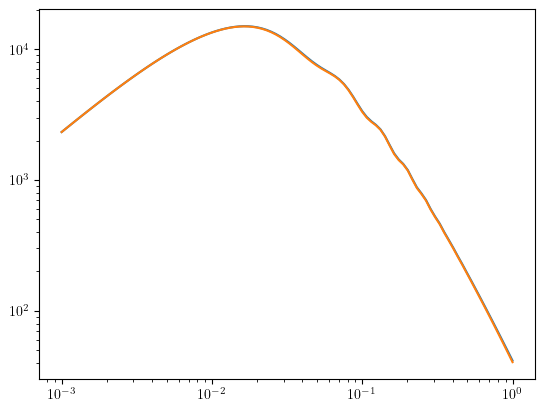

In [92]:
zvals=np.linspace(0,1,1000)
plt.loglog(kk, Pm_0)
plt.loglog(kk, Pm_2)
plt.show()